# Predicting the revenue that would be generated from icecream sales with respect to temperature

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#uploading the dataset 
icecream = pd.read_csv("D://IceCreamData.csv")
print("dataset uploaded")

dataset uploaded


### Analyzing the dataset

In [3]:
icecream.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [4]:
icecream.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
icecream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
icecream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
icecream.shape

(500, 2)

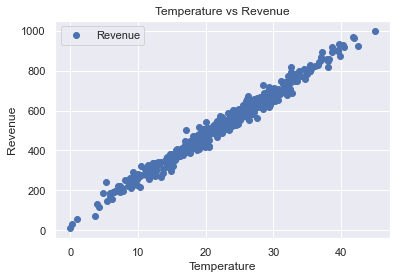

In [8]:
icecream.plot(x='Temperature',y='Revenue',style='o')
plt.title('Temperature vs Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

### From the graph we can say that , the revenue generated is linear to the change in temperature . So we will use linear regression for predicting the revenues .

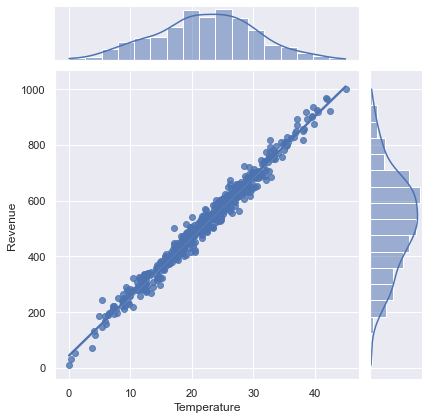

In [9]:
sns.jointplot(x='Temperature',y='Revenue',data=icecream,kind='reg')

In [10]:
x = icecream['Temperature']
y = icecream['Revenue']

In [11]:
x

0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
         ...    
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736
Name: Temperature, Length: 500, dtype: float64

In [12]:
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Declaring the independent variable (x) and dependent variable (y)

In [14]:
x = icecream['Temperature'].values.reshape(-1,1)
y = icecream['Revenue'].values.reshape(-1,1)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)#training the algorithm

LinearRegression()

In [16]:
print("Intercept :",regressor.intercept_)

Intercept : [43.78867085]


In [17]:
print("Coefficient :",regressor.coef_)

Coefficient : [[21.49082669]]


In [18]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual :':y_test.flatten(),'Predicted :':y_pred.flatten()})
print(df)

      Actual :  Predicted :
0   704.281439   697.707072
1   632.901914   652.739041
2   662.558990   664.134040
3   449.813300   450.147723
4   636.298374   664.877682
5   469.909033   441.006651
6   587.221246   583.553776
7   581.074005   623.271996
8   675.828916   666.888049
9   493.710333   468.333683
10  506.432135   546.354759
11  427.138369   443.047811
12  644.488633   622.399213
13  350.629036   377.351271
14  366.247714   366.776707
15  965.493040   944.779684
16  898.805423   892.959033
17  648.453609   693.827041
18  586.138767   545.578718
19  405.661446   420.245072
20  395.273750   390.775779
21  572.537048   596.488947
22  288.158145   283.039720
23  643.788331   654.913996
24  396.935648   380.689328
25  412.082357   411.986607
26  353.325633   370.762345
27  478.598509   509.804905
28  474.749392   479.300534
29  463.065614   456.304042
30  654.894955   639.545333
31  306.749930   281.457797
32  319.349462   313.960895
33  471.701557   469.621630
34  559.135869   559

In [19]:
df1 = df.head(20)
df1

,Actual :,Predicted :
0,704.281439,697.707072
1,632.901914,652.739041
2,662.558990,664.134040
3,449.813300,450.147723
4,636.298374,664.877682
5,469.909033,441.006651
6,587.221246,583.553776
7,581.074005,623.271996
8,675.828916,666.888049
9,493.710333,468.333683


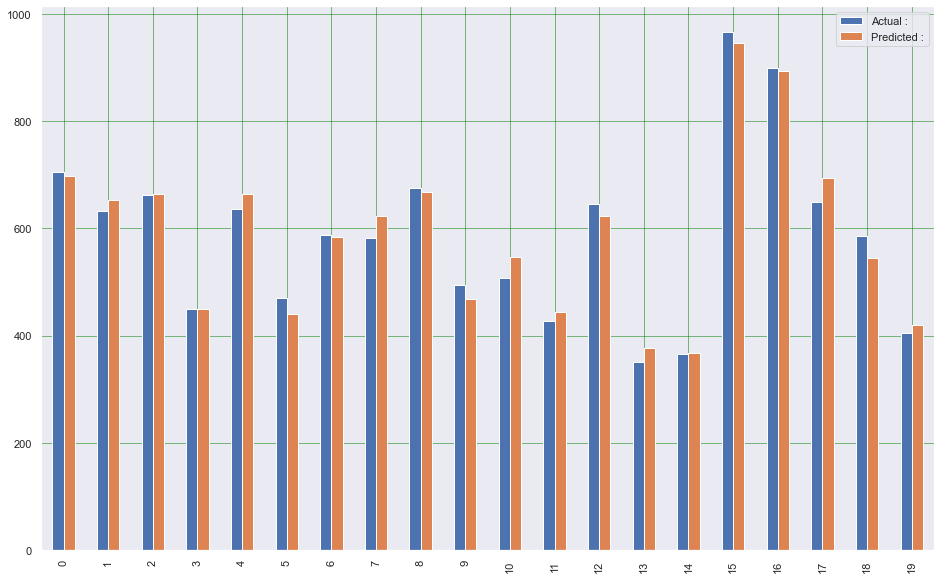

In [20]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='black')
plt.show()

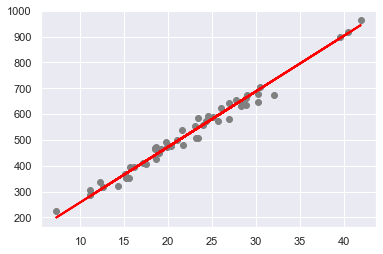

In [20]:
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

In [21]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error :',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error : 18.193514526756175
Mean Squared Error : 510.36278285590174
Root Mean Squared Error : 22.591210300820578


In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_test,y_pred)

0.9791262338866669

## So we can see that our model is approximately 98% fit . 